In [1]:
# fastcampus 딥러닝/머신러닝을 활용한 시계열 데이터분석 참고
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
datapath = 'https://github.com/mchoimis/tsdl/raw/main/income/'
df = pd.io.parsers.read_csv(datapath+'income.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
print(df.shape)
print(df.columns)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df[df=='?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
X = df.drop(['income', 'education', 'fnlwgt'], axis=1)
y = df['income']

In [11]:
X.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [12]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
32098,40,State-gov,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [14]:
X_test.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
22278,56,Private,5,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States
8950,19,Private,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,25,United-States
7838,23,Private,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,35,Vietnam
16505,37,Federal-gov,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
19140,49,Private,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States


In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9769 entries, 22278 to 20721
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9769 non-null   object
 2   education.num   9769 non-null   int64 
 3   marital.status  9769 non-null   object
 4   occupation      9769 non-null   object
 5   relationship    9769 non-null   object
 6   race            9769 non-null   object
 7   sex             9769 non-null   object
 8   capital.gain    9769 non-null   int64 
 9   capital.loss    9769 non-null   int64 
 10  hours.per.week  9769 non-null   int64 
 11  native.country  9769 non-null   object
dtypes: int64(5), object(7)
memory usage: 992.2+ KB


In [16]:
from sklearn import preprocessing

categorical = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
    le = preprocessing.LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature]) # fit_transform을 했으면 다음부터 transform로. 안그러면 같은것이 다른 번호로 나올 수 있다.
    X_test[feature] = le.transform(X_test[feature])

In [17]:
X_train[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
32098,6,2,3,5,4,0,38
25206,1,2,6,0,4,1,38
23491,3,4,3,1,4,0,38


In [18]:
X_test[categorical].head(3)

,workclass,marital.status,occupation,relationship,race,sex,native.country
22278,3,6,11,4,4,0,38
8950,3,4,5,3,4,0,38
7838,3,4,7,1,1,0,39


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [20]:
X_train_scaled.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


In [21]:
print(min(X_train['age']))
print(max(X_train['age']))
print(np.mean(X_train['age']))
print(np.var(X_train['age']))
print('\n')
print(min(X_test['age']))
print(max(X_test['age']))
print(np.mean(X_test['age']))
print(np.var(X_test['age']))

17
90
38.61429448929449
186.44402697680712


17
90
38.505476507319074
185.14136114309127


In [22]:
print(min(X_train_scaled['age']))
print(max(X_train_scaled['age']))
print(np.mean(X_train_scaled['age']))
print(np.var(X_train_scaled['age']))
print('\n')
print(min(X_test_scaled['age']))
print(max(X_test_scaled['age']))
print(np.mean(X_test_scaled['age']))
print(np.var(X_test_scaled['age']))

-1.5829486507307393
3.7632934651328265
1.7567165303651125e-16
1.0


-1.5829486507307393
3.7632934651328265
-0.007969414769866482
0.9930130996694361


Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred = logreg.predict(X_test)
# logreg_score = accuracy_score(y_test, y_pred)
print('Logistic Regression accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score : 0.8057


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
y_pred_scaled = logreg.predict(X_test_scaled)
logreg_score = accuracy_score(y_test, y_pred)
print('Logistic Regression(scaled score) accuracy score : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression(scaled score) accuracy score : 0.8057


In [27]:
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [28]:
from sklearn.metrics import classification_report

cm_logreg_scaled_data = classification_report(y_test, y_pred_scaled)
print(cm_logreg_scaled_data)

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769



RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [30]:
criterion='gini' # the function to measure the quality of a split.
n_estimators = 100 # the number of trees in the forest

In [31]:
y_pred = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, y_pred)
print('Random Forest Model accuracy score : {0:0.4f}'.format(rfc_score))

Random Forest Model accuracy score : 0.8475


Random Forest 모델의 Confusion Matrix 확인하기

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix for Binary Labels\n')
# print('Confusion Matrix for Binary Labels\n')
# print('Actual class')
# print('Predicted', '[[True Positive', 'False Positive]')
# print('         ', '[False Negative', 'True Negative]]')
print(cm)

Confusion Matrix for Binary Labels

[[6832  578]
 [ 912 1447]]


In [33]:
print('\nRecall for class [<=50k] = ', cm[0,0], '/', cm[0,0]+cm[0,1])
print('\nRecall for class [<=50k] = ', cm[0,0], '/', cm[0,0]+cm[1,0])
print('\nRecall for class [>50k] = ', cm[1,1], '/', cm[1,0]+cm[1,1])
print('\nRecall for class [>50k] = ', cm[1,1], '/', cm[0,1]+cm[1,1])


Recall for class [<=50k] =  6832 / 7410

Recall for class [<=50k] =  6832 / 7744

Recall for class [>50k] =  1447 / 2359

Recall for class [>50k] =  1447 / 2025


Random Forest 모델의 분류결과 확인하기

In [34]:
from sklearn.metrics import classification_report

cm_rfc = classification_report(y_test, y_pred)
print(cm_rfc)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7410
        >50K       0.71      0.61      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



Gradient Boosting 모델 구현하고 정확도 확인하기

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [36]:
y_pred = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, y_pred)
print('GradientBoosting accuracy score : {0:0.4f}'.format(gbc_score))

GradientBoosting accuracy score : 0.8621


Gradient Boosting 모델의 분류 결과 확인하기

In [37]:
from sklearn.metrics import classification_report

cm_gbc = classification_report(y_test, y_pred)
print(cm_gbc)

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



Light GBM 구현하고 정확도 확인하기

In [38]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

lgbm = LGBMClassifier(random_state=0)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

lgbm_score = accuracy_score(y_test, y_pred)
print('LGBM model accuracy score : {0:0.4f}'.format(lgbm_score))


[LightGBM] [Info] Number of positive: 5482, number of negative: 17310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 22792, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240523 -> initscore=-1.149814
[LightGBM] [Info] Start training from score -1.149814
LGBM model accuracy score : 0.8696


  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1493, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [39]:
from sklearn.metrics import classification_report

cm_lgbm = classification_report(y_test, y_pred)
print(cm_lgbm)

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      7410
        >50K       0.77      0.65      0.71      2359

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



final summary

In [40]:
print('Accuracy comparisons for Binary Models\n')
print('logreg_score:', '{0:0.5f}'.format(logreg_score))
print('rfc_score:', '{0:0.5f}'.format(rfc_score))
print('gbc_score:', '{0:0.5f}'.format(gbc_score))
print('lgbm_score:', '{0:0.5f}'.format(lgbm_score))

Accuracy comparisons for Binary Models

logreg_score: 0.80571
rfc_score: 0.84748
gbc_score: 0.86211
lgbm_score: 0.86959


In [41]:
print ('Classification Comparions for Binary Models\n')
print ('logreg_score:', '{0:0.4f}'.format(logreg_score))
print (cm_logreg_scaled_data)
print ('rfc_score   :', '{0:0.4f}'.format(rfc_score))
print (cm_rfc)
print ('gbc_score   :', '{0:0.4f}'.format(gbc_score ))
print (cm_gbc)
print ('lgbm_score  :', '{0:0.4f}'.format(lgbm_score))
print (cm_lgbm)

Classification Comparions for Binary Models

logreg_score: 0.8057
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7410
        >50K       0.71      0.44      0.55      2359

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

rfc_score   : 0.8475
              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7410
        >50K       0.71      0.61      0.66      2359

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

gbc_score   : 0.8621
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7410
        >50K       0.78      0.59      0.68      2359

    accuracy                           0.86      9769
   macro avg       0

모델 및 데이터 설명

logreg : Logistic Regression Classifier

rfc : Random Forest Classifier

gbc : Gradient Boosting Classifier

lgbm : LightGBM Classifier

In [42]:
### 로지스틱 모델 회귀계수 해석하기

In [43]:
# X_test 의 컬럼명 확인하기

X_test.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'native.country'],
      dtype='object')

In [45]:
# Logistic Regression 이진분류 모델의 회귀계수 확인하기

logreg.coef_

array([[ 0.45435118, -0.08929983,  0.88011855, -0.37428934, -0.01347698,
        -0.19718355,  0.08082303,  0.43380857,  2.34127172,  0.27435968,
         0.37244795,  0.01498249]])

y(소득) = a + b1X1 + b2X2 + ... bpXp

=
a + (0.45435118\*age) + (-0.08929983\*workclass.dummy) + ... + (0.01498249\*native.country.dummy)

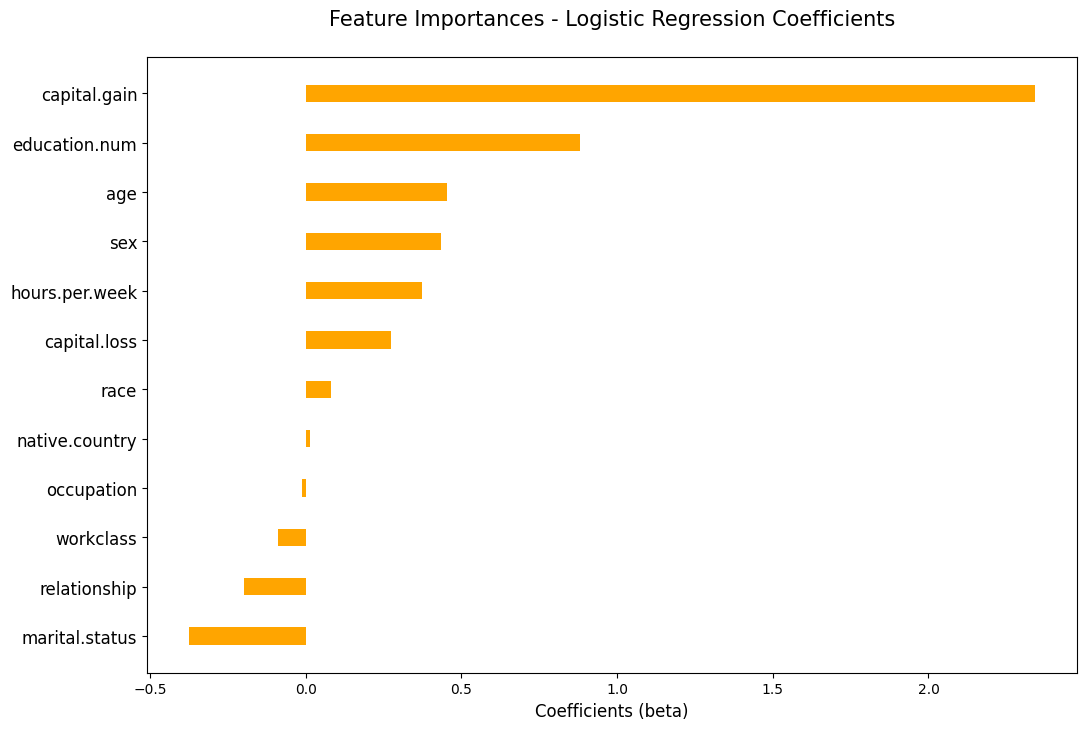

In [47]:
# Logistic Regression 이진분류 모델의 회귀계수 시각화 하기

indices =  np.argsort(coef)  # 회귀계수 크기 순으로 정렬

plt.figure(figsize=(12, 8))
plt.barh(X_test.columns, coef[indices], .35, color='orange', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=12)
plt.xlabel('Coefficients (beta)', fontsize=12)
plt.title('Feature Importances - Logistic Regression Coefficients\n', fontsize=15)
plt.show()

In [48]:
importances = rfc.feature_importances_
importances

array([0.21102807, 0.04772442, 0.14352686, 0.06772349, 0.0834323 ,
       0.1229214 , 0.01851696, 0.01058052, 0.12541587, 0.04046346,
       0.10972828, 0.01893838])

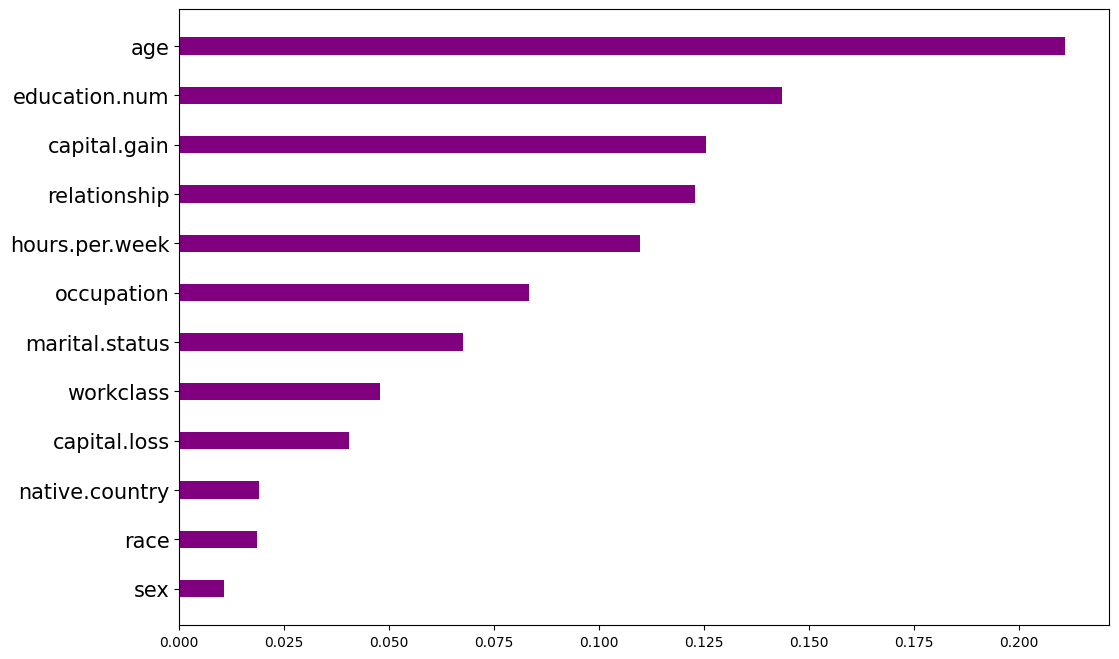

In [49]:
# Random Forest 이진분류 모델의 피처 중요도 확인하기

indices = np.argsort(importances)

plt.figure(figsize=(12, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=15)
plt.show()
# 강사)한 변수에 의존하면 분류기를 믿기가 어려울 수 있다. 데이터가 고르게 분포되어있는 것이 마음에 놓인다.

In [53]:
importances = gbc.feature_importances_
importances

array([5.87970708e-02, 5.51372125e-03, 2.10092686e-01, 4.33635936e-02,
       1.92692089e-02, 3.34389426e-01, 3.03009270e-04, 4.93262744e-03,
       2.22548066e-01, 6.02457254e-02, 3.97442162e-02, 8.00649340e-04])

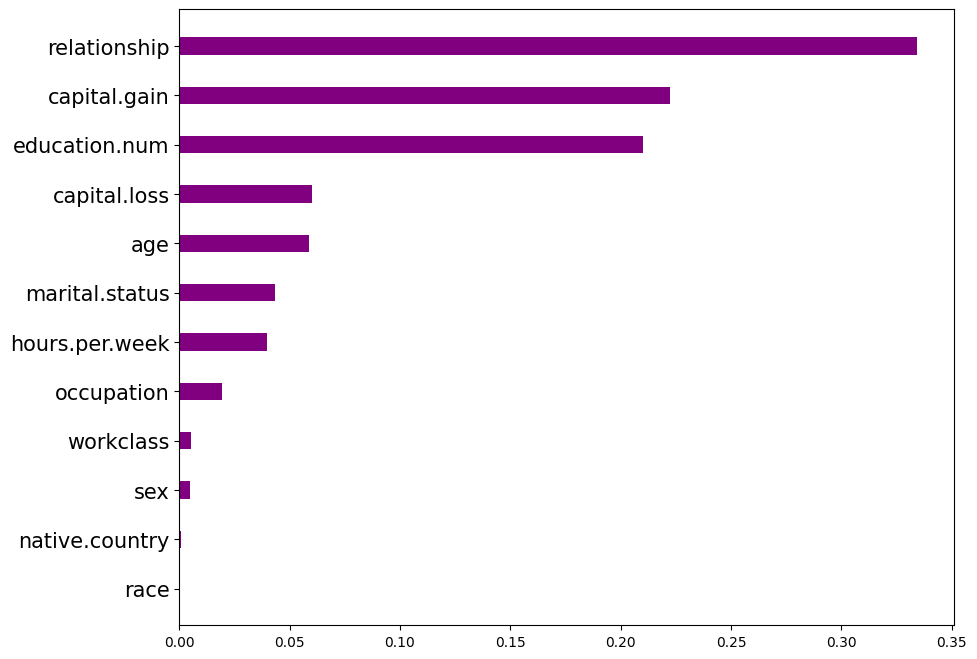

In [54]:
# Gradient Boosting 이진분류 모델의 피처 중요도 확인하기

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='purple', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=15)
plt.show()

In [55]:
# LightGBM 이진분류 피처 중요도 분석하기

In [56]:
# 중요도 확인 # 피처별 분기한 횟수
importances = lgbm.feature_importances_
importances

array([611, 174, 332, 162, 329, 150,  63,  50, 378, 264, 398,  89])

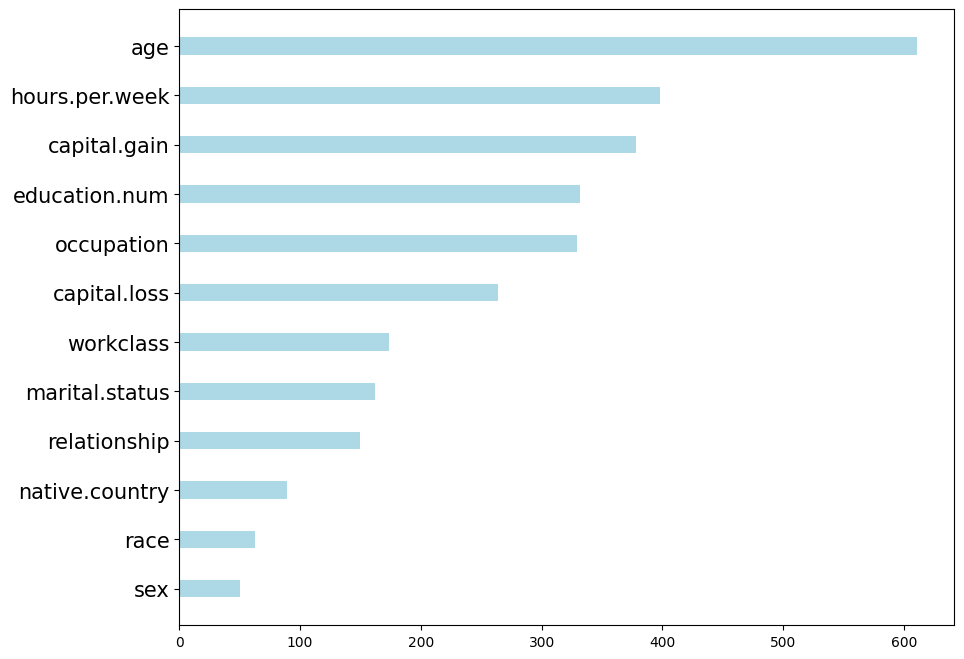

In [58]:
# LightGBM 이진분류 모델의 피처 중요도 시각화 하기

indices = np.argsort(importances)

plt.figure(figsize=(10, 8))

plt.barh(X_test.columns, importances[indices], .35, color='lightblue', align='center')
plt.yticks(X_test.columns, X_test.columns[indices], fontsize=15)
plt.show()

Text(0.5, 0, 'Feature Importance (# of splits)')

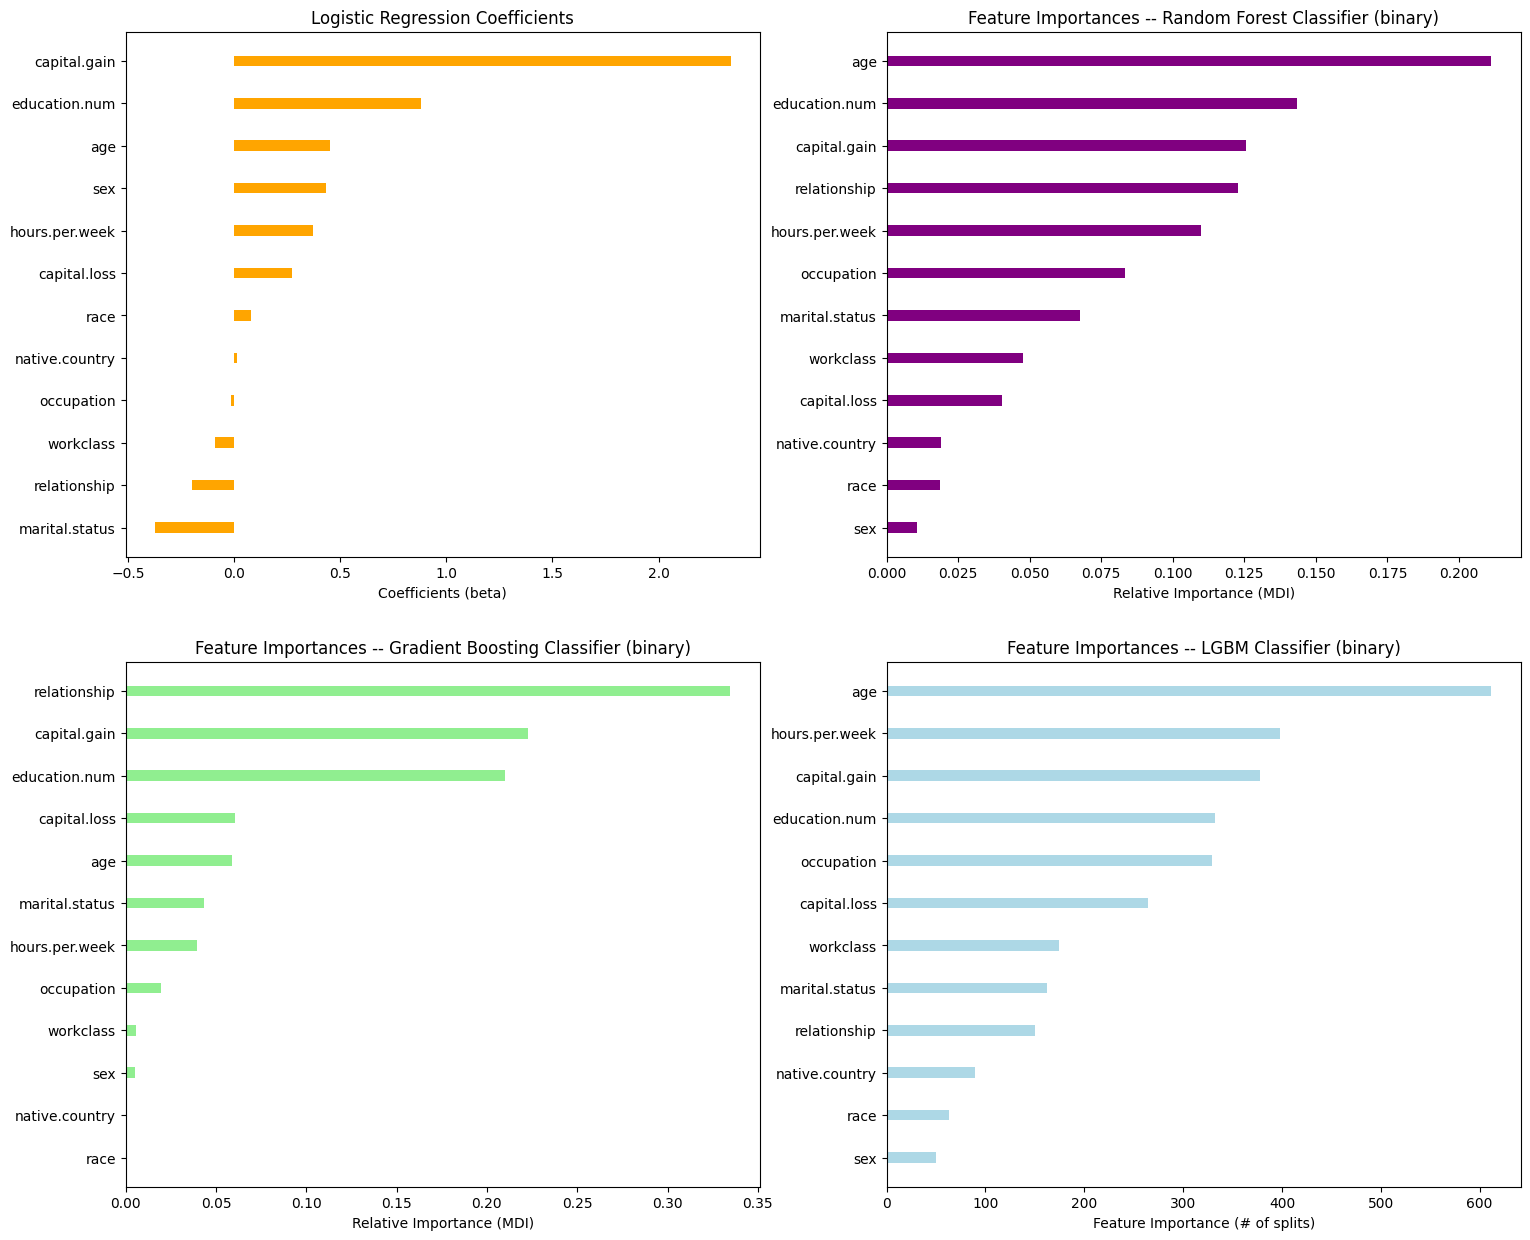

In [59]:
# subplot을 이용하여 4개 이진분류 모델(logreg, gbc, rfc, lgbm)의 회귀계수 및 피처 중요도 시각화 비교하기

plt.figure(figsize=(18, 15))

plt.subplot(2, 2, 1)
indices_logreg = np.argsort(coef)   ###

plt.title('Logistic Regression Coefficients')
plt.barh(X_test.columns, coef[indices_logreg], .25, color='orange')
plt.yticks(X_test.columns, X_test.columns[indices_logreg])
plt.xlabel('Coefficients (beta)')

plt.subplot(2, 2, 2)
importances_rfc = rfc.feature_importances_  ###
indices_rfc = np.argsort(importances_rfc)  ###

plt.title('Feature Importances -- Random Forest Classifier (binary)')
plt.barh(X_test.columns, importances_rfc[indices_rfc], .25, color='purple')
plt.yticks(X_test.columns, X_test.columns[indices_rfc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 3)
importances_gbc = gbc.feature_importances_  ###
indices_gbc =  np.argsort(importances_gbc)  ###

plt.title('Feature Importances -- Gradient Boosting Classifier (binary)')
plt.barh(X_test.columns, importances_gbc[indices_gbc], .25, color='lightgreen')
plt.yticks(X_test.columns, X_test.columns[indices_gbc])
plt.xlabel('Relative Importance (MDI)')

plt.subplot(2, 2, 4)
importances_lgbm = lgbm.feature_importances_  ###
indices_lgbm = np.argsort(importances_lgbm)  ###

plt.title('Feature Importances -- LGBM Classifier (binary)')
plt.barh(X_test.columns, importances_lgbm[indices_lgbm], .25, color='lightblue')
plt.yticks(X_test.columns, X_test.columns[indices_lgbm])
plt.xlabel('Feature Importance (# of splits)')

In [60]:
# Coefficients : +와 -로 나눌 수 있다. 상대값이 아니다. 식을 만들어서 쓸 수 있다.
# MDI: 상대값(0~1) - RandomForest: 넓다. | GradientBoosting: 좁다. 
# LightGBM feature importances: 분기의 횟수를 나타낸다.

In [ ]:
# 잘 안나오면 변수처리 다시, 샘플링 다시, overfitting 줄이기.